In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
from pandas import DataFrame



# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [11]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


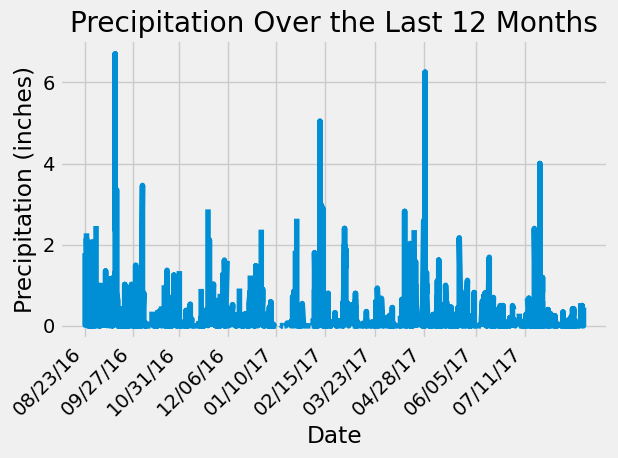

In [14]:
from matplotlib.dates import DateFormatter

# Design a query to retrieve the last 12 months of precipitation data and plot the results.

precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
precip

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip)

# Sort the dataframe by date
precip_df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df['date'] = pd.to_datetime(precip_df['date'])

num_ticks = 10  # Set the desired number of ticks
step = max(len(precip_df['date']) // num_ticks, 1)
plt.xticks(precip_df['date'][::step], rotation=45, ha='right')

date_format = DateFormatter('%m/%d/%y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.plot(precip_df['date'], precip_df['prcp'], label='Precipitation')
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,date,prcp
count,2230,2021.000000
mean,2017-02-16 05:31:15.874439424,0.177279
min,2016-08-23 00:00:00,0.000000
25%,2016-11-18 00:00:00,0.000000
50%,2017-02-14 12:00:00,0.020000
75%,2017-05-17 00:00:00,0.130000
max,2017-08-23 00:00:00,6.700000
std,NaN,0.461190


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [16]:
session.query(Measurement.station).all()

[('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC005193

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('station_count')) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'

temperature_stats = session.query(func.min(Measurement.tobs).label('min_temperature'),
                                  func.max(Measurement.tobs).label('max_temperature'),
                                  func.avg(Measurement.tobs).label('avg_temperature')) \
    .filter(Measurement.station == most_active_station_id) \
    .first()

temperature_stats

(54.0, 85.0, 71.66378066378067)

In [20]:
temperature_data = session.query(Measurement.date, Measurement.tobs) \
    .filter(Measurement.station == most_active_station_id) \
    .filter(Measurement.date >= query_date) \
    .all()

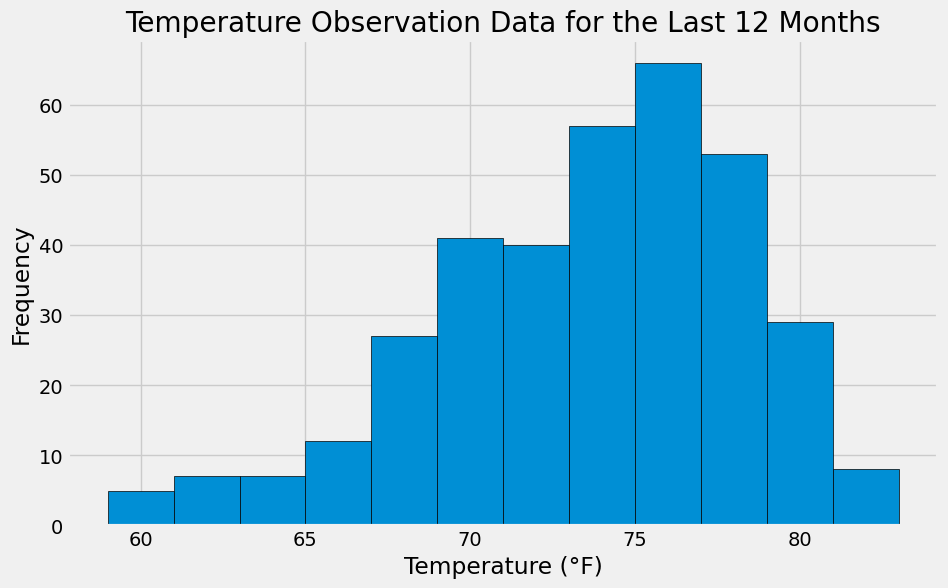

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = session.query(Measurement.date, Measurement.tobs) \
    .filter(Measurement.station == most_active_station_id) \
    .filter(Measurement.date >= query_date) \
    .all()

# Create a DataFrame from the query results
temperature_df = pd.DataFrame(temperature_data, columns=['date', 'temperature'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['temperature'], bins=12, edgecolor='black')
plt.title('Temperature Observation Data for the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()